AIML CA1 PART A: CLASSIFICATION

Features : Gender, Education, Credit Limit, Payment history [Bill_amount1, Bill_amount2, Bill_amount3 and Pay_amount1, Pay_amount2, Pay_amount3]

Target variable : Defaulting of payment the next month

importing the required libraries

In [137]:
import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Opening and accessing the dataset

In [138]:
data = pd.read_csv('credit_dataset.csv', index_col=0)

Exploartory data analysis - analysing, exploring and cleaning the data

In [139]:
data.head()

,Credit Limit,Gender,Education,Marriage Status,Age,Bill_Amount1,Bill_Amount2,Bill_Amount3,Pay_Amount1,Pay_Amount2,Pay_Amount3,Default payment next month
Customer ID,,,,,,,,,,,,
1,20000,female,univeresity,married,24,3913,3102,689,0,689,0,1
2,120000,female,univeresity,single,26,2682,1725,2682,0,1000,1000,1
3,90000,female,univeresity,single,34,29239,14027,13559,1518,1500,1000,0
4,50000,female,univeresity,married,37,46990,48233,49291,2000,2019,1200,0
5,50000,male,univeresity,married,57,8617,5670,35835,2000,36681,10000,0


Check for missing values, the info of the data and its statistics

In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600 entries, 1 to 1600
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Credit Limit                1600 non-null   int64 
 1   Gender                      1600 non-null   object
 2   Education                   1600 non-null   object
 3   Marriage Status             1600 non-null   object
 4   Age                         1600 non-null   int64 
 5   Bill_Amount1                1600 non-null   int64 
 6   Bill_Amount2                1600 non-null   int64 
 7   Bill_Amount3                1600 non-null   int64 
 8   Pay_Amount1                 1600 non-null   int64 
 9   Pay_Amount2                 1600 non-null   int64 
 10  Pay_Amount3                 1600 non-null   int64 
 11  Default payment next month  1600 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 162.5+ KB


In [141]:
data.isna().sum()

Credit Limit                  0
Gender                        0
Education                     0
Marriage Status               0
Age                           0
Bill_Amount1                  0
Bill_Amount2                  0
Bill_Amount3                  0
Pay_Amount1                   0
Pay_Amount2                   0
Pay_Amount3                   0
Default payment next month    0
dtype: int64

In [142]:
data.describe()

,Credit Limit,Age,Bill_Amount1,Bill_Amount2,Bill_Amount3,Pay_Amount1,Pay_Amount2,Pay_Amount3,Default payment next month
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,166787.500000,35.224375,49263.408125,47726.644375,44531.051875,5547.646250,5230.494375,4451.610625,0.212500
std,129944.635707,9.404550,72687.106917,71476.217397,67164.064239,14085.471957,15569.605419,12491.715387,0.409205
min,10000.000000,21.000000,-14386.000000,-13543.000000,-9850.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3138.000000,3288.250000,2321.500000,1000.000000,468.500000,226.500000,0.000000
50%,140000.000000,34.000000,20320.500000,19769.500000,19332.500000,2176.500000,1904.000000,1313.500000,0.000000
75%,230000.000000,41.000000,61602.750000,59891.750000,53857.250000,5021.000000,4592.500000,4000.000000,0.000000
max,700000.000000,75.000000,507726.000000,509229.000000,499936.000000,239104.000000,285138.000000,222750.000000,1.000000


Lets take a look at the number of people who will default next month and the number who wont

In [143]:
# Calculating the percentage of those who defaulted and those who did not
default = data[data['Default payment next month'] == 1].shape[0]
non_default = data[data['Default payment next month'] == 0].shape[0]

print(default / (default + non_default) * 100, "% of payments that were defaulted")
print(non_default / (default + non_default) * 100, "% of payments that were defaulted")

21.25 % of payments that were defaulted
78.75 % of payments that were defaulted


Visualising the data in respect to whether they defaulted their payment or not

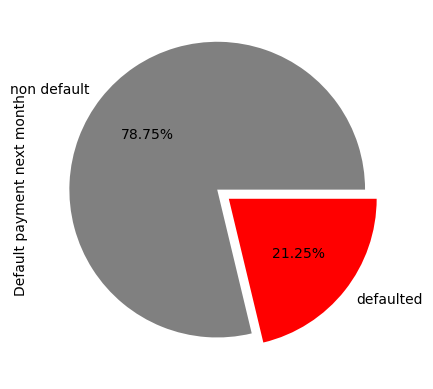

In [144]:
# Visualising the percentage of those who defaulted and those who did not
colors = ['grey','red']
labels = ['non default', 'defaulted']
data['Default payment next month'].value_counts().plot(kind = 'pie',autopct = '%1.2f%%', explode = (0.05, 0.05), labels = labels, colors = colors)
plt.show()

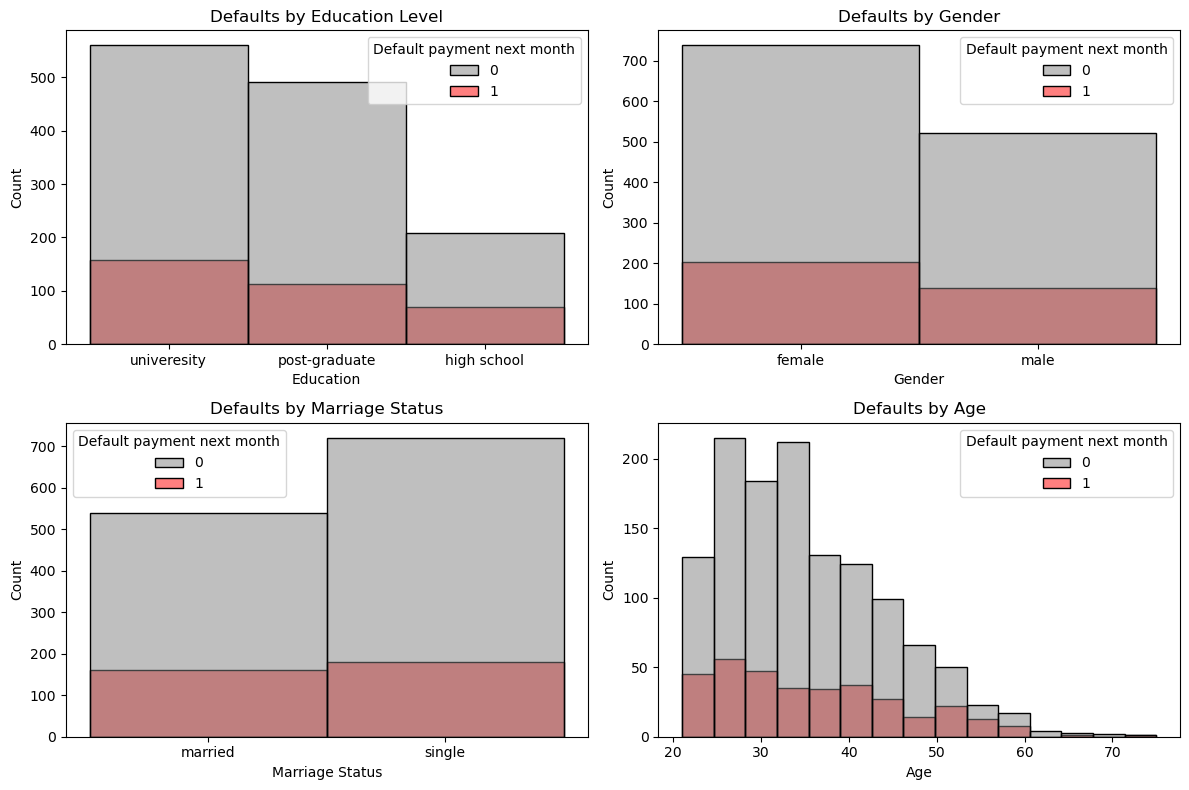

In [145]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
colors = ["grey", "red"]

# Visualising the number of defaults by education level
sns.histplot(data=data, x='Education', hue='Default payment next month',palette = colors, ax=axes[0, 0])
axes[0, 0].set_title('Defaults by Education Level')

# Visualising the number of defaults by gender
sns.histplot(data=data, x='Gender', hue='Default payment next month',palette = colors, ax=axes[0, 1])
axes[0, 1].set_title('Defaults by Gender')

# Visualising the number of defaults by marriage status
sns.histplot(data=data, x='Marriage Status', hue='Default payment next month',palette = colors, ax=axes[1, 0])
axes[1, 0].set_title('Defaults by Marriage Status')

# Visualising the number of defaults by age
sns.histplot(data=data, x='Age', hue='Default payment next month',palette = colors, bins=15, ax=axes[1, 1])
axes[1, 1].set_title('Defaults by Age')

plt.tight_layout()
plt.show()


Finding the correlation between the features by using a heatmap to present the correlation matrix

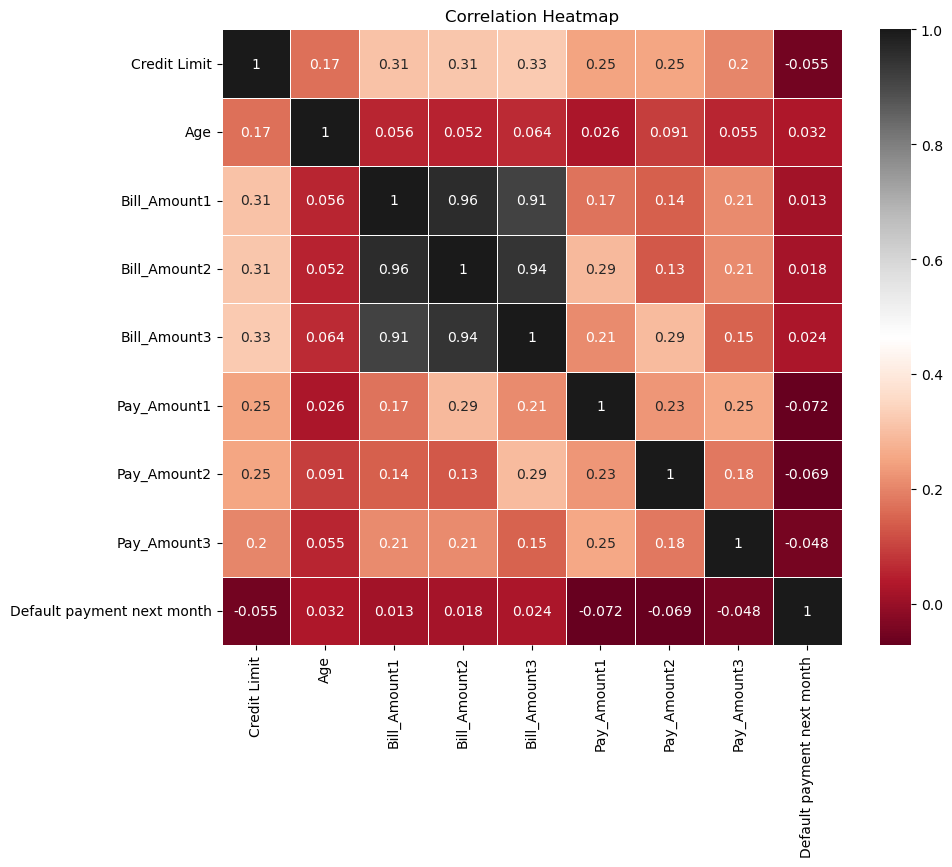

In [146]:
# Computing the correlation matrix
corr_matrix = data.corr()

# Creating a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='RdGy', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Feature engineering - Scaling the numerical values

In [147]:
# # Creating a new column Remainder to find out the amouont the customer owes the bank after the 3rd month
# data['remainder'] = data['Bill_Amount1'] + data['Bill_Amount2'] + data['Bill_Amount3'] - data['Pay_Amount1'] - data['Pay_Amount2'] - data['Pay_Amount3']

# # Calculating the percentage of those who paid more than their bills and those paid less
# neg = data[data['remainder'] < 0].shape[0]
# pos = data[data['remainder'] > 0].shape[0]

# print(neg / (neg + pos) * 100, "% of people have paid the bank more money then they were billed")
# print(pos / (neg + pos) * 100, "% of still owe the bank money")

'Bill_Amount1', 'Bill_Amount2', 'Bill_Amount3', 'Pay_Amount1', 'Pay_Amount2', 'Pay_Amount3'

# # Percentage of Credit Limit used by every customer
# data['percent_CL'] = data['remainder'] / data['Credit Limit']

In [148]:
# # Percentage of Credit Limit used by every customer
# data['percent_CL'] = data['remainder'] / data['Credit Limit']
    


In [149]:
# Perform one-hot encoding
dummies = pd.get_dummies(data[["Gender", "Education", "Marriage Status"]], drop_first=True)

# Concatenate the original data with the encoded dummies
data_enc = pd.concat([data, dummies], axis=1)

print(data_enc.head())

             Credit Limit  Gender    Education Marriage Status  Age  \
Customer ID                                                           
1                   20000  female  univeresity         married   24   
2                  120000  female  univeresity          single   26   
3                   90000  female  univeresity          single   34   
4                   50000  female  univeresity         married   37   
5                   50000    male  univeresity         married   57   

             Bill_Amount1  Bill_Amount2  Bill_Amount3  Pay_Amount1  \
Customer ID                                                          
1                    3913          3102           689            0   
2                    2682          1725          2682            0   
3                   29239         14027         13559         1518   
4                   46990         48233         49291         2000   
5                    8617          5670         35835         2000   

           

Feature selection - Choosing the rows to work with 

In [152]:
# # Create a subset to be dropped
# to_drop = ["Gender", "Education", "Marriage Status","Bill_Amount1", "Bill_Amount2", "Bill_Amount3", "Pay_Amount1", "Pay_Amount2", "Pay_Amount3","Credit Limit","remainder"]

# #Drop the data for feature selection
# data_enc = data_enc.drop(to_drop, axis = 1)
# print(data_enc.head())

# Create a subset to be dropped
to_drop = ["Gender", "Education", "Marriage Status"]

#Drop the data for feature selection
data_enc = data_enc.drop(to_drop, axis = 1)
print(data_enc.head())

             Credit Limit  Age  Bill_Amount1  Bill_Amount2  Bill_Amount3  \
Customer ID                                                                
1                   20000   24          3913          3102           689   
2                  120000   26          2682          1725          2682   
3                   90000   34         29239         14027         13559   
4                   50000   37         46990         48233         49291   
5                   50000   57          8617          5670         35835   

             Pay_Amount1  Pay_Amount2  Pay_Amount3  \
Customer ID                                          
1                      0          689            0   
2                      0         1000         1000   
3                   1518         1500         1000   
4                   2000         2019         1200   
5                   2000        36681        10000   

             Default payment next month  Gender_male  Education_post-graduate  \
Custome

Splitting data to train and test datasets

In [156]:
# Split the data into features (X) and target variable (y)
x = data_enc.drop("Default payment next month", axis=1)
y = data_enc["Default payment next month"]

# Gaussian Naive Bayes
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier


# split dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,stratify = y, test_size=0.20)

# fit a Naive Bayes model to the data
model = SGDClassifier()
model.fit(X_train, y_train)
print(model.score(X_test,y_test))

# make predictions
y_pred = model.predict(X_test)

# summarize the fit of the model
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))


0.7875
              precision    recall  f1-score   support

           0       0.79      1.00      0.88       252
           1       0.00      0.00      0.00        68

    accuracy                           0.79       320
   macro avg       0.39      0.50      0.44       320
weighted avg       0.62      0.79      0.69       320

[[252   0]
 [ 68   0]]


c:\Users\3mm3t\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\3mm3t\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\3mm3t\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


k nearest neighbours

logistic regression

naive bayes classifier

decision trees

support vector machines

check for accuracy, recall and precision (can be found in confusion matrix)

can use binary curve

extra trees